# RFM Model

Here we implement RFM model to segment our customers

## Import packages that we will use

* `pandas` and `numpy` for data manipulation
* `matplotlib`, `seaborn`, `squaritfy` for vasulization
* `datetime

In [1]:
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify

## import data

Let's import and check out our dataset

In [24]:
df = pd.read_csv('data.csv')
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


We can see that the minimun value of UnitPrice is negative but we do not that

In [25]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We also see that InvoiceDate's values are string

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


To make the analysis simple and fast, We limit it to only country == 'United Kingdom' and UnitPrice > 0

In [27]:
df = df[(df.Country == 'United Kingdom') & (df.UnitPrice > 0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Recency

First check on the latest date in the dataset 

In [28]:
last_date = dt.date(2011,12,9) #lastest date is 12/9/2011
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,12/9/2011 12:49,7.08,13113.0,United Kingdom


Since the date values are string we need to change it to datetime format for our calculation

In [29]:
df['date'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M').dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


Calculation Recency based on difference between lastest data and invoicedate

In [30]:
date_diff = lambda row : last_date - row.date
df['Recency'] = df.apply(date_diff, axis=1)

Finding the lastest date that each customer shop on our store

In [31]:
df_gp_r = df.groupby('CustomerID').date.max().reset_index()
df_gp_r['Recency'] = df_gp_r.apply(date_diff, axis=1)
df_gp_r.columns = ['CustomerID', 'LastPurchaseDate', 'Recency']
df_gp_r['Recency'] = df_gp_r['Recency'].dt.days
df_gp_r.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


## Frequency

Here we calculate how ofen a customer shop on our store
Since one customer can have many product in a transaction meaning transaction number can be dupllicate
We find only distinct invoiceNo and drop other duplicate values

In [32]:
df_fre = df.copy()
df_fre = df.drop_duplicates(subset=['CustomerID', 'InvoiceNo'], keep='first')
df_fre_gp = df_fre.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df_fre_gp = df_fre_gp.rename(columns={'InvoiceNo' : 'Frequency'})
df_fre_gp.head()

,CustomerID,Frequency
0,12346.0,2
1,12747.0,11
2,12748.0,223
3,12749.0,8
4,12820.0,4


## Monetary

we calculate then total 

In [33]:
df['Total'] = df['Quantity'] * df['UnitPrice']
df_gp_m = df.groupby('CustomerID')['Total'].sum()
df_gp_m = df_gp_m.reset_index()
df_gp_m = df_gp_m.rename(columns={'Total' : 'Monetary'})
df_gp_m.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34


In [34]:
df_gp_r.info()
df_fre_gp.info()
df_gp_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949 entries, 0 to 3948
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        3949 non-null   float64
 1   LastPurchaseDate  3949 non-null   object 
 2   Recency           3949 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 92.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949 entries, 0 to 3948
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3949 non-null   float64
 1   Frequency   3949 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 61.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949 entries, 0 to 3948
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3949 non-null   float64
 1   Monetary    3949 non-null   float64
dtype

Drop the 'LastPurchaseDate' column to make our dataframe clean

In [35]:
df_gp_r = df_gp_r.drop(['LastPurchaseDate'], axis=1)

Merge datafram Recency, Frequency, Monetery to create RFM model

In [37]:
rf = df_gp_r.merge(df_fre_gp, left_on = 'CustomerID', right_on = 'CustomerID')
rfm = rf.merge(df_gp_m, left_on = 'CustomerID', right_on = 'CustomerID')
rfm = rfm.set_index('CustomerID')
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12747.0,2,11,4196.01
12748.0,0,223,29072.10
12749.0,3,8,3868.20
12820.0,3,4,942.34
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


In [45]:
df[df.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Recency,Total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,325 days,77183.6


Scoring based on quartile

In [39]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)    

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [40]:
quantile = rfm.quantile(q=[0.25,0.5,0.75])
quantile

,Recency,Frequency,Monetary
0.25,16.0,1.0,282.45
0.50,50.0,3.0,627.13
0.75,143.0,5.0,1521.79


In [41]:
rfm_segmentation = rfm.copy()
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(Rscore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore,args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore,args=('Monetary',quantile))

Apply function to get RFM score 

In [45]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_Score
CustomerID,,,,,,,,
12346.0,325,2,0.00,4,3,4,434,11
12747.0,2,11,4196.01,1,1,1,111,3
12748.0,0,223,29072.10,1,1,1,111,3
12749.0,3,8,3868.20,1,1,1,111,3
12820.0,3,4,942.34,1,2,2,122,5


Calculate total RFM score

In [46]:
rfm_segmentation['RFMScore'] = rfm_segmentation['R_Quartile'].map(str) + rfm_segmentation['F_Quartile'].map(str) + rfm_segmentation['M_Quartile'].map(str)

rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_Score
CustomerID,,,,,,,,
12346.0,325,2,0.00,4,3,4,434,11
12747.0,2,11,4196.01,1,1,1,111,3
12748.0,0,223,29072.10,1,1,1,111,3
12749.0,3,8,3868.20,1,1,1,111,3
12820.0,3,4,942.34,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,277,1,180.60,4,4,4,444,12
18281.0,180,1,80.82,4,4,4,444,12
18282.0,7,3,176.60,1,3,4,134,8


In [47]:
rfm_segmentation['Total_Score'] = rfm_segmentation.apply(lambda row: row['R_Quartile'] + row['F_Quartile'] + row['M_Quartile'], axis=1)

In [48]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_Score
CustomerID,,,,,,,,
12346.0,325,2,0.00,4,3,4,434,11
12747.0,2,11,4196.01,1,1,1,111,3
12748.0,0,223,29072.10,1,1,1,111,3
12749.0,3,8,3868.20,1,1,1,111,3
12820.0,3,4,942.34,1,2,2,122,5


Segment our customers based on RFM score

In [49]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))


BC = len(rfm_segmentation[rfm_segmentation['RFMScore']=='111'])
LC = len(rfm_segmentation[rfm_segmentation['F_Quartile']==1])
BS = len(rfm_segmentation[rfm_segmentation['M_Quartile']==1])
AL = len(rfm_segmentation[rfm_segmentation['RFMScore']=='134'])
LC = len(rfm_segmentation[rfm_segmentation['RFMScore']=='344'])
LCC = len(rfm_segmentation[rfm_segmentation['RFMScore']=='444'])

Best Customers:  442
Loyal Customers:  978
Big Spenders:  987
Almost Lost:  41
Lost Customers:  163
Lost Cheap Customers:  367


In [51]:
# rfm_segmentation = rfm_segmentation.drop(columns='level_0')
rfm_segmentation = rfm_segmentation.reset_index()
group_rfm = rfm_segmentation.groupby('Total_Score')['CustomerID'].count()
# group_rfm = group_rfm.drop(columns='level_0')
group_rfm = group_rfm.reset_index()

Visualize to see what our customers are like

[Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12')]

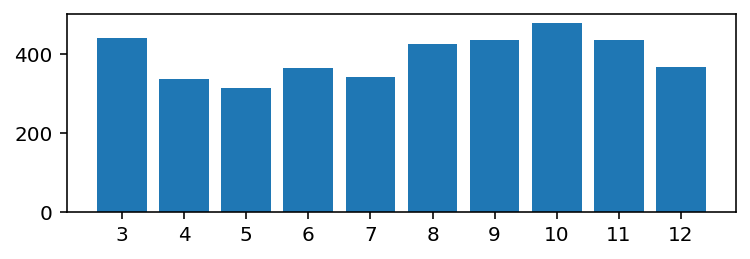

In [53]:
x = group_rfm['Total_Score']
count = group_rfm['CustomerID']

ax = plt.subplot(2,3,(1,3))
plt.bar(x, count)
ax.set_xticks(x)
ax.set_xticklabels(x)

We have best customers of 442, which we need to focus on with special privilages. However, the largest segment is big spenders which we need to improve on their recency and frquency allow them to visit the shop more often in order to turn them into  our best customers

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Best Customers'),
  Text(1, 0, 'Loyal Customers'),
  Text(2, 0, 'Big Spenders'),
  Text(3, 0, 'Almost Lost'),
  Text(4, 0, 'Lost Customers'),
  Text(5, 0, 'Lost Cheap Customers')])

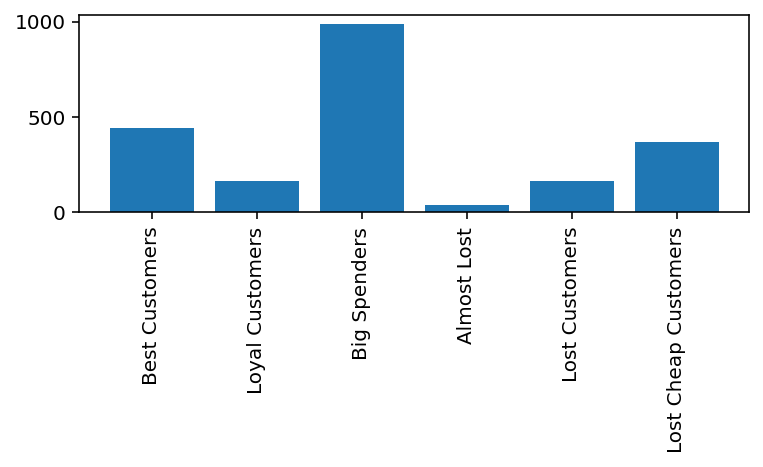

In [54]:
values = [BC, LC, BS, AL, LC, LCC]
types = ['Best Customers','Loyal Customers','Big Spenders','Almost Lost','Lost Customers','Lost Cheap Customers']

ax = plt.subplot(2,3,(1,3))
plt.bar(range(len(types)), values)
ax.set_xticks(range(len(types)))
ax.set_xticklabels(types)
plt.xticks(rotation=90)

Visuilze our segmentatioin with tee map

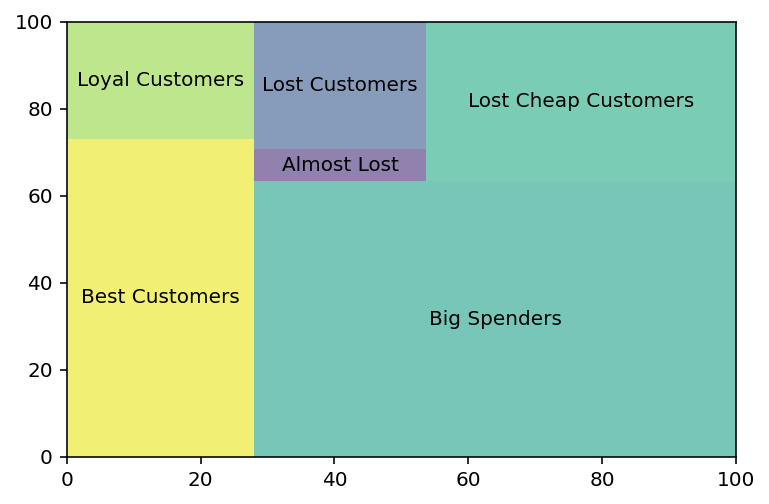

In [55]:
squarify.plot(sizes=values, label=types, alpha=0.6 )
plt.show()

How each type of RFM segmentation spend their money on average

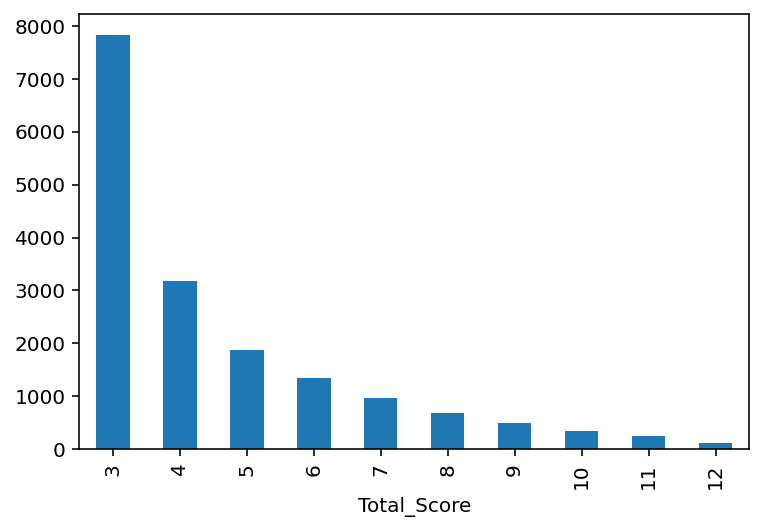

In [56]:
plt.clf()
rfm_segmentation.groupby('Total_Score')['Monetary'].mean().plot(kind='bar')
plt.show()

How each type of RFM segmentation recently visit our shop on average

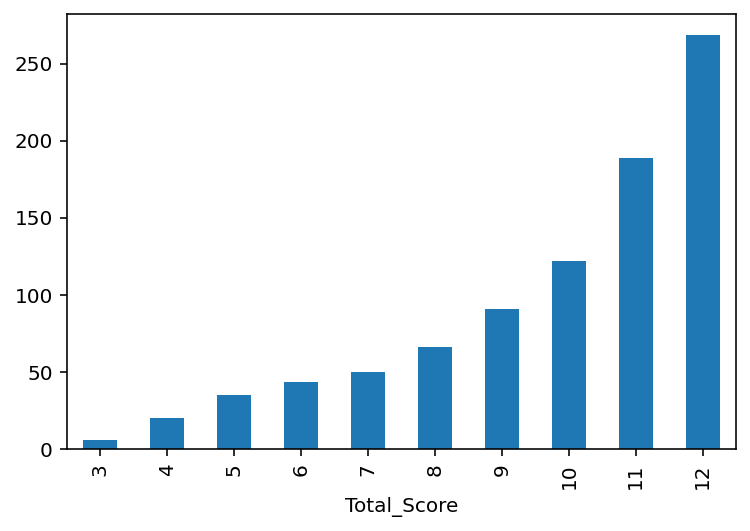

In [57]:
plt.clf()
rfm_segmentation.groupby('Total_Score')['Recency'].mean().plot(kind='bar')
plt.show()

How frquent each type of RFM segmentation buy at our shop

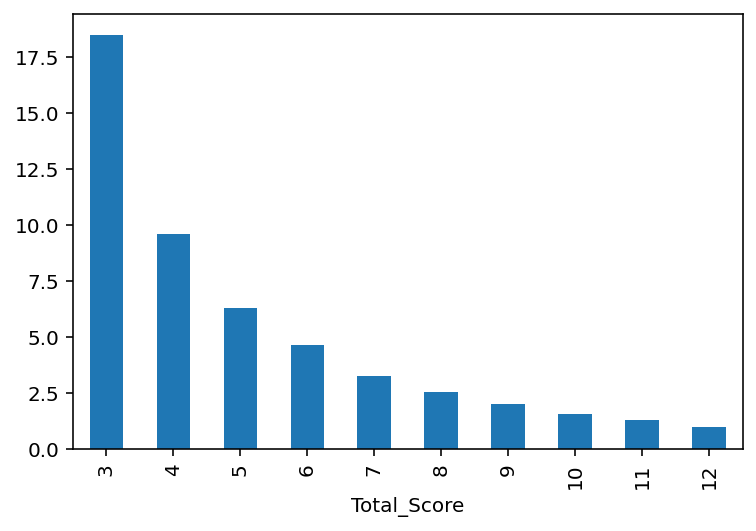

In [58]:
plt.clf()
rfm_segmentation.groupby('Total_Score')['Frequency'].mean().plot(kind='bar')
plt.show()